# Stanford Open Policing Project Florida Machine Learning Experiment

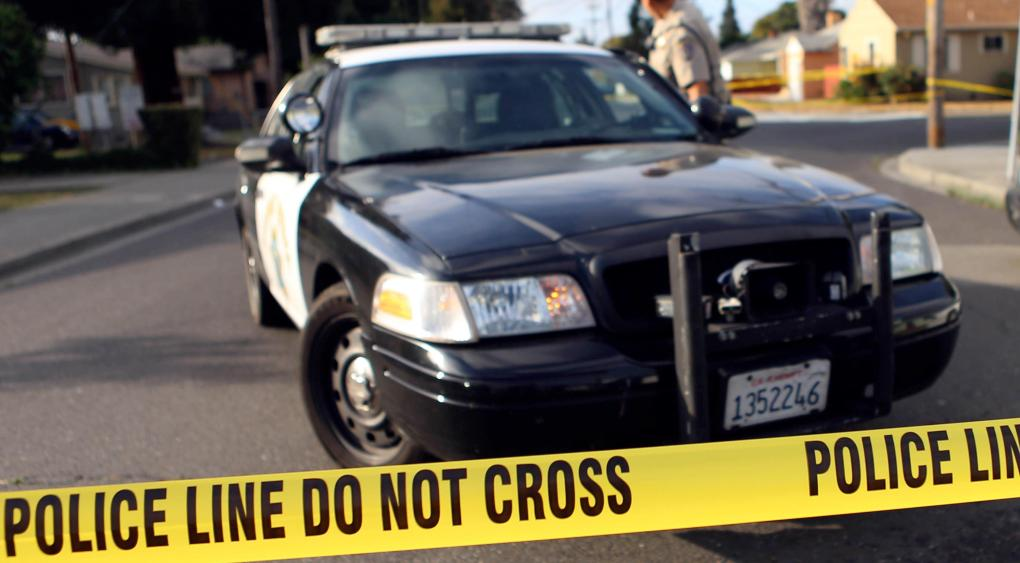

In [33]:
from IPython.display import Image
Image(filename='stanford-police.jpg')

## Introduction & Rationale



The Stanford Open Policing Project, developed and freely distributed by Stanford University, examines patterns in traffic stop data across the United States. Among its key findings: Black drivers are stopped at disproportionately higher rates than white drivers nationwide, while Hispanic drivers are stopped at rates comparable to or lower than white drivers (Ruiz-Grossman, 2019).

This notebook, however, focuses specifically on traffic stop data from Florida—the fourth most populous state and the third-largest economy in the U.S. Surprisingly, no example code is provided for Florida in the KaggleHub version of the dataset.

Florida presents a particularly rich and complex case for analysis. South Florida, in particular, is known for its large Hispanic and elderly populations, as well as its broader socioeconomic and ethnoracial diversity. Notably, the dataset includes traffic stops in areas near Broward College, making the analysis especially relevant for understanding policing in the local community.

This project investigates the likelihood of specific stop outcomes based on driver demographics and environmental factors such as time and location. The primary goals are to:

*   Assess the predictability of traffic stop outcomes (which has implications for understanding fairness),
*   Apply and compare a range of predictive modeling techniques, and
*   Strengthen data processing and analysis skills.

The analysis is structured into two main sections:

*   Data Management – Cleaning and preparing the dataset for analysis,

*   Predictive Modeling – Building models to forecast stop outcomes and evaluate potential bias.

Thank you.

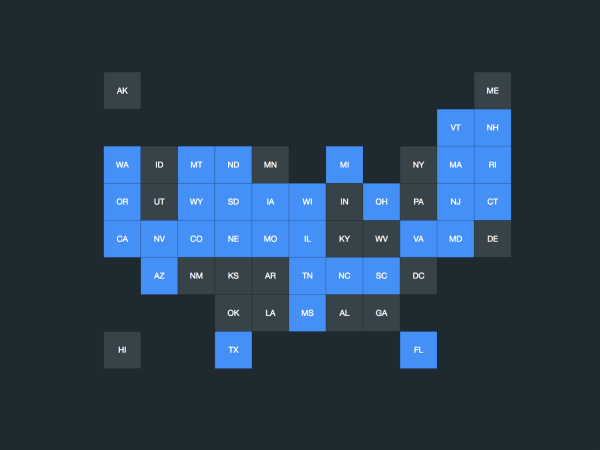

In [34]:
Image(filename='stanford-open-policing-project.png')

## Data Management

### Environment Setup

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [36]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stanford-open-policing/stanford-open-policing-project-florida")

print("Path to dataset files:", path)

Path to dataset files: /Users/luis/.cache/kagglehub/datasets/stanford-open-policing/stanford-open-policing-project-florida/versions/1


### Import Data

In [37]:
df = pd.read_csv(r"{}".format(path + "/FL.csv"), dtype="unicode")

### Data Analysis

In [38]:
df.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_type,contraband_found,stop_outcome,is_arrested,officer_id,officer_gender,officer_age,officer_race,officer_rank,out_of_state
0,FL-2010-000001,FL,2010-01-01,23:11,SARASOTA,Sarasota County,12115,NaN,NaN,F,...,NaN,NaN,Citation,NaN,1743,NaN,NaN,NaN,CPL,FALSE
1,FL-2010-000002,FL,2010-01-01,23:11,SARASOTA,Sarasota County,12115,NaN,NaN,NaN,...,NaN,FALSE,Citation,FALSE,1743,M,NaN,NaN,NaN,NaN
2,FL-2010-000003,FL,2010-01-06,16:14,DUVAL,Duval County,12031,JACKSONVILLE,NaN,F,...,NaN,FALSE,Citation,FALSE,2138,M,31,Black,TROOPER,TRUE
3,FL-2010-000004,FL,2010-01-08,19:39,DUVAL,Duval County,12031,JACKSONVILLE,NaN,F,...,NaN,FALSE,Misdemeanor Arrest,TRUE,2595,M,29,White,TPR,FALSE
4,FL-2010-000005,FL,2010-01-11,11:56,ST. LUCIE,St. Lucie County,12111,NaN,NaN,M,...,NaN,FALSE,Misdemeanor Arrest,TRUE,2586,M,26,White,TPR.,FALSE


In [39]:
df.tail()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_type,contraband_found,stop_outcome,is_arrested,officer_id,officer_gender,officer_age,officer_race,officer_rank,out_of_state
5421441,FL-2016-581398,FL,2016-10-31,23:48,SUMTER,Sumter County,12119,NaN,NaN,NaN,...,NaN,FALSE,Faulty Equipment Notice,FALSE,4038,M,28,White,NaN,NaN
5421442,FL-2016-581399,FL,2016-10-31,23:49,PALM BEACH,Palm Beach County,12099,ROYAL PALM BEACH,NaN,NaN,...,NaN,FALSE,Citation,FALSE,1619,M,49,White,NaN,NaN
5421443,FL-2016-581400,FL,2016-10-31,23:52,COLLIER,Collier County,12021,NAPLES,NaN,NaN,...,NaN,FALSE,Warning,FALSE,2937,NaN,NaN,NaN,NaN,NaN
5421444,FL-2016-581401,FL,2016-10-31,23:56,CHARLOTTE,Charlotte County,12015,NaN,NaN,NaN,...,NaN,FALSE,Warning,FALSE,3710,M,27,NaN,NaN,NaN
5421445,FL-2016-581402,FL,2016-10-31,23:59,PALM BEACH,Palm Beach County,12099,NaN,NaN,NaN,...,NaN,FALSE,Citation,FALSE,3847,M,53,White,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421446 entries, 0 to 5421445
Data columns (total 28 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   id                     object
 1   state                  object
 2   stop_date              object
 3   stop_time              object
 4   location_raw           object
 5   county_name            object
 6   county_fips            object
 7   fine_grained_location  object
 8   police_department      object
 9   driver_gender          object
 10  driver_age_raw         object
 11  driver_age             object
 12  driver_race_raw        object
 13  driver_race            object
 14  violation_raw          object
 15  violation              object
 16  search_conducted       object
 17  search_type_raw        object
 18  search_type            object
 19  contraband_found       object
 20  stop_outcome           object
 21  is_arrested            object
 22  officer_id             object
 23  officer

In [41]:
df.describe()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_type,contraband_found,stop_outcome,is_arrested,officer_id,officer_gender,officer_age,officer_race,officer_rank,out_of_state
count,5421446,5421446,5421446,5421232,5421445,5420620,5420620,1234959,0,4104671,...,28942,4972818,5369820,5001760,5421446,4679214,4427568,4171164,4105144,4106672
unique,5421446,1,2488,1440,73,67,67,505,0,2,...,14,1,5,2,2779,2,59,5,131,2
top,FL-2010-000001,FL,2010-09-03,10:00,MIAMI-DADE,Miami-Dade County,12086,JACKSONVILLE,NaN,M,...,Probable Cause,FALSE,Citation,FALSE,2164,M,28,White,TROOPER,FALSE
freq,1,5421446,4314,9110,487645,487645,487645,165913,NaN,2726387,...,12885,4972818,3944721,4825325,29130,4352689,159676,2928438,3068299,3634293


In [42]:
df.isnull().sum()

id                             0
state                          0
stop_date                      0
stop_time                    214
location_raw                   1
county_name                  826
county_fips                  826
fine_grained_location    4186487
police_department        5421446
driver_gender            1316775
driver_age_raw           1319560
driver_age               1327591
driver_race_raw             1344
driver_race                 1345
violation_raw             419696
violation                 419686
search_conducted          419686
search_type_raw           423606
search_type              5392504
contraband_found          448628
stop_outcome               51626
is_arrested               419686
officer_id                     0
officer_gender            742232
officer_age               993878
officer_race             1250282
officer_rank             1316302
out_of_state             1314774
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.shape

(5421446, 28)

In [45]:
df["officer_rank"].unique()

array(['CPL', nan, 'TROOPER', 'TPR', 'TPR.', 'CORPORAL', 'LIEUTENANT',
       'LT.', 'TRP', 'SERGEANT', 'SGT', 'SGT.', 'CPL.', 'CAPT.', 'CPT',
       'W', 'CORP', 'CAPT', 'LT', 'MAJ.', 'CAPTAIN', 'COLONEL', 'MAJOR',
       'TRR', 'TRR.', 'CORP.', 'TRP.', 'CPT.', 'CHIEF', 'TROOPER RE',
       'SERGEANT`', 'MCPL.', 'TRPR', 'PILOT', 'MASTER SGT', 'MSTR/SGT',
       'MASTR SGT', 'MASGT SGT.', 'M/SGT', 'TFC.', 'MASTER TRP',
       'TRP 1ST CL', 'TRP. SPC.', 'T1C', 'M/TPR.', 'TFC', 'S-TROOPER',
       'S-TPR', 'M/SERGEANT', 'M/SGT.', 'MSGT.', 'M/CPL', 'MASTER TPR',
       'MSTR TPR', 'TPR 1ST CL', 'SGT/1CLASS', 'M/TROOPER', 'MSTR/TPR.',
       'MSTR./TPR.', 'DIRECTOR', 'MSGT', 'MST TRP', 'OFFICER', 'M/TPR',
       'SFC', 'M.SGT', 'M TROOPER', 'MSTR TRP', 'MCPL', 'TPR SPC',
       'M. CPL', 'M.TROOPER', 'MASTER CPL', 'MASTER COR', 'SR TPR',
       'MASTR CPL', 'MSTR CPL', 'STAFF SGT.', 'M/TRP', 'MSR TRP',
       'SR.TROOPER', 'SR TROOPER', 'SR.TPR', 'COPORAL', 'SR TRP', 'MTPR.',
       'SR. T

In [46]:
df["stop_outcome"].unique()

array(['Citation', 'Misdemeanor Arrest', nan, 'Warning',
       'Faulty Equipment Notice', 'Felony Arrest'], dtype=object)

### Data Visualization

### Data Preprocessing

Argubaly the most arduous challenge was data preprocessing, as it took an exceptionally long time compile and correct the number of officer ranks to reduce the amount of storage taken up by one-hot encoding, and the time of day needed to be adjusted into a number using wave functions that could be manipulated by the machine learning models. Before this was refined into two different categories, the amount of memory and processing power needed was enough to crash the kernel and slow down a modern Macbook Air.

In [47]:
from sklearn.utils import resample

# Set the sample size
df = df.dropna(axis=0, thresh=10)
df = df[df['is_arrested'].notna()]
df = df.sample(5000)

In [48]:
# Replaces officer names with standard copies to reduce one-hot encoding variability
organized_rank_names = [
        "TRPR", "TRPRFC/SPC", "SR.TRPR", "M.TRPR",
        "CPRL", "M.CPRL", "SGT",
        "M.SGT", "S.SGT", "SGTFC",
        "LT", "CPT", "MAJ"
]

deviated_rank_names = [
        ["TROOPER", "TPR", "TPR.", "TRP", "TRP.", "TROOPER RE", "TPOOPER", "TPR/S", "TPR SPC", "TRR", "TRR.",  "RESERVE TR", "CVE TRP", "K9 TPR", "K9 TPR."],
        ["TPR 1ST CL", "TFC.", "TFC", "TRP 1ST CL", "TRP. SPC.", "T1C", "TRPR 1ST/SPC", "TPR1CLASS", "TPR/S", "TPR SPC", "S-TROOPER", "S-TPR", "S/TPR.", "STPR"],
        ["SR.TRPR", "SR TRP", "SR. TPR.", "SR.TPR", "SENIOR TPR", "SR.TPR.", "S.TPR", "SR TPR", "SR.TPR", "SR.TROOPER", "SR TROOPER",],
        ["MASTER TPR", "MASTER TRP", "MSTR TRP", "MSTR TPR", "M/TPR.", "M/TPR", "MSTR. TPR.", "MSTR TPR.", "MSTR  TPR", "M. TPR.", "M/TROOPER", "M.TROOPER", "M TROOPER", "MSTR/TPR", "MSTR/TPR.",
         "MSTR./TPR.", "MST TPR", "MST TRP", "MST. TRP.", "MTROOPER", "MSTPR", "MAST. TPR.", "M/TRP", "MSR TRP", "MTPR", "MTPR."],
        ["CORPORAL", "CPL", "CPL.", "CORP", "CORP.", "COPORAL", "CORPORL"],
        ["MASTER CPL", "MASTER COR", "MASTR CPL", "MCPL", "MSTR CPL", "MSTRCPL", "MSTR.CPL", "MSTR.CPL.", "M. CPL", "M. CPL.", "M/CPL", "MASTERCPL.", "MST CPL", "MAST CPL", "MCPL."],
        ["SERGEANT", "SGT", "SGT.", "SERGEANT`"],
        ["MASTER SGT", "MSTR/SGT", "MASTR SGT", "MASGT SGT.", "M/SGT", "M/SERGEANT", "M/SGT.", "MSGT.", "MSGT", "M.SGT", "M / SGT", "M.SERGEANT", "MST.SERGEA"],
        ["STAFF SGT.", "STAFF SGT", "STAFF SERG"],
        ["SGT/1CLASS", "SGT 1ST CL", "S/SERGEANT", "S. SGT", "SFC", "S. SGT."],
        ["LIEUTENANT", "LT.", "LTC"],
        ["CAPTAIN", "CAPT.", "CPT", "CPT.", "AUX CAPTAI", "AUX CAPT.", "CAPT>"],
        ["MAJOR", "MAJ", "MAJ.", "AUX MAJOR"],
    ]

for i, rank_name in enumerate(deviated_rank_names):
    for rank in rank_name:
        df['officer_rank'] = df['officer_rank'].replace(rank, organized_rank_names[i])

In [49]:
df["officer_rank"] = df["officer_rank"].fillna("N/A")

In [50]:
df["officer_rank"].unique()

array(['TRPR', 'N/A', 'CPRL', 'SGT', 'OFFICER', 'CPT', 'LT', 'M.TRPR',
       'TRPRFC/SPC', 'M.SGT', 'SR.TRPR', 'CAPT', 'M.CPRL'], dtype=object)

In [51]:
#Turn times in hours of the day for simplicity.
df['stop_hour'] = pd.to_datetime(df['stop_time']).dt.hour

#Get the sine and cosine to make the vairable cylical.
df['sin_hour'] = np.sin(2 * np.pi * df['stop_hour'] / max(df['stop_hour'])).astype('float32')
df['cos_hour'] = np.cos(2 * np.pi * df['stop_hour'] / max(df['stop_hour'])).astype('float32')

/var/folders/5s/tqq7h_qj4xz6djt6sj1cym_80000gn/T/ipykernel_62640/3899172295.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['stop_hour'] = pd.to_datetime(df['stop_time']).dt.hour


In [52]:
from sklearn.preprocessing import LabelEncoder

# Forward filling all NaN values
df = df.ffill()

# Define and store the target column
target_col = df['is_arrested'].copy()

# One-hot encode the violations information
violations_dummies = df['violation_raw'].str.get_dummies(sep='|')

# Use these columns for predictors about whether an arrest will happen based on demographics exclusively
cols_about_dem = ['driver_gender', 'driver_age', 'driver_race', 'officer_gender', 
                           'officer_age', 'officer_race', 'officer_rank']

# One-hot encode the demographics information
dem_dummies = pd.get_dummies(df[cols_about_dem], dtype = 'uint8')
dem_df = pd.concat([dem_dummies, violations_dummies], axis = 1)

# Use these columns for predictors about whether an arrest will happen based on environment exclusively
env_dummies = pd.get_dummies(df['location_raw'])
env_df = pd.concat([env_dummies, df['sin_hour'], df['cos_hour'], violations_dummies], axis = 1)

# Supress output to prevent Javascript error
_ = None

/var/folders/5s/tqq7h_qj4xz6djt6sj1cym_80000gn/T/ipykernel_62640/840438125.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.ffill()


In [53]:
dem_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 379078 to 341204
Columns: 150 entries, driver_gender_F to officer_rank_TRPRFC/SPC
dtypes: uint8(150)
memory usage: 771.5 KB


In [54]:
dem_dummies.shape

(5000, 150)

In [55]:
dem_dummies.columns

Index(['driver_gender_F', 'driver_gender_M', 'driver_age_15.0',
       'driver_age_16.0', 'driver_age_17.0', 'driver_age_18.0',
       'driver_age_19.0', 'driver_age_20.0', 'driver_age_21.0',
       'driver_age_22.0',
       ...
       'officer_rank_LT', 'officer_rank_M.CPRL', 'officer_rank_M.SGT',
       'officer_rank_M.TRPR', 'officer_rank_N/A', 'officer_rank_OFFICER',
       'officer_rank_SGT', 'officer_rank_SR.TRPR', 'officer_rank_TRPR',
       'officer_rank_TRPRFC/SPC'],
      dtype='object', length=150)

In [56]:
env_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 379078 to 341204
Columns: 129 entries, ALACHUA to WINDOW TINT
dtypes: bool(69), float32(2), int64(58)
memory usage: 2.6 MB


In [57]:
env_df.shape

(5000, 129)

In [58]:
env_df.shape

(5000, 129)

## Predictive Modeling

### Classification

In this section, we create our models for classification, which include:
* <b>Logistic Regression<b> - Evaluates the probability that the results point to a given outcome and chooses the highest value.
* <b>Random Forest<b> - Develops multiple decision trees and eventually combines their findings to make a "forest".
* <b>Bernoulli Naive Bayes<b> - Uses a probabilistic approach on binary information to make an educated guess.
* <b>K Nearest Neighbors<b> - These identify the K closest data points in the training set and choose the most common class.

We use timeit and memit to evaluate their performance, then put their results through a confusion matrix outlining possible outcomes (where 0 identifies no arrest and 1 an arrest) to make better sense of the models' performance outside the statistics.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [60]:
X_dem = dem_dummies
y_dem = target_col

X_env = env_df
y_env = target_col

In [61]:
%%timeit

%memit X_train_dem, X_test_dem, y_train_dem, y_test_dem = train_test_split(X_dem, y_dem, test_size=0.25, stratify=y_dem)

peak memory: 3132.47 MiB, increment: 2.67 MiB
peak memory: 3132.69 MiB, increment: 0.22 MiB
peak memory: 3132.89 MiB, increment: 0.20 MiB
peak memory: 3132.94 MiB, increment: 0.05 MiB
peak memory: 3132.97 MiB, increment: 0.03 MiB
peak memory: 3132.97 MiB, increment: 0.00 MiB
peak memory: 3133.17 MiB, increment: 0.20 MiB
peak memory: 3133.17 MiB, increment: 0.00 MiB
695 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
%%timeit

%memit X_train_env, X_test_env, y_train_env, y_test_env = train_test_split(X_env, y_env, test_size=0.25, stratify=y_env)

peak memory: 3027.17 MiB, increment: -106.03 MiB
peak memory: 3027.17 MiB, increment: 0.00 MiB
peak memory: 3027.17 MiB, increment: 0.00 MiB
peak memory: 3027.17 MiB, increment: 0.00 MiB
peak memory: 3029.66 MiB, increment: 2.48 MiB
peak memory: 3030.97 MiB, increment: 1.31 MiB
peak memory: 3031.05 MiB, increment: 0.08 MiB
peak memory: 3031.09 MiB, increment: 0.05 MiB
688 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
# Import predictive models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

models = {"Logistic Regression" : LogisticRegression(penalty='l2', solver='saga', max_iter=100),
          "Random Forest Classifier" : RandomForestClassifier(n_estimators=10, max_depth=5, max_features='sqrt'),
          "Bernoulli Naive Bayes" : BernoulliNB(),
          "K Nearest Neighbors" : KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
}

69.9 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.42 ms ± 231 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
peak memory: 464.84 MiB, increment: 6.73 MiB
peak memory: 464.95 MiB, increment: 0.11 MiB
Logistic Regression accuracy for demographics: 0.9688
Logistic Regression f1 score for demographics: 0.417910447761194
Logistic Regression coefficient importances: [[ 8.28123937e-01 -1.51312284e-01  3.70241918e-01 -3.96600174e-02
   2.16310179e-01 -9.26944568e-01 -2.77713753e-02 -1.87432675e-01
  -1.50670617e-01 -4.00009738e-01  2.34367248e-01  1.55467115e-01
  -3.32048402e-01 -1.13232632e-01  5.07188372e-01 -4.15521779e-02
  -1.07473090e-01  6.04508312e-01  1.89049803e-01 -1.84504197e-02
  -1.98771858e-02 -5.22999917e-03 -8.82983571e-02  8.37013690e-02
  -9.94640311e-01 -4.21575638e-01  4.02799906e-03 -5.31651207e-01
  -1.44180306e-01 -1.57844179e-02 -2.12809185e-01 -9.93705101e-02
  -1.23336898e-02  1.39478300e-02  5.92031587e-01  4.30573199e-01
  -4.370

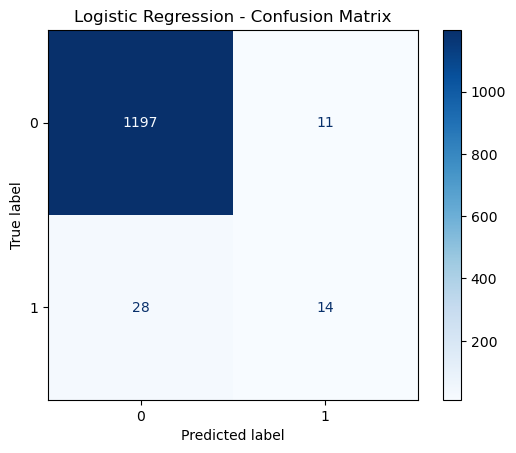

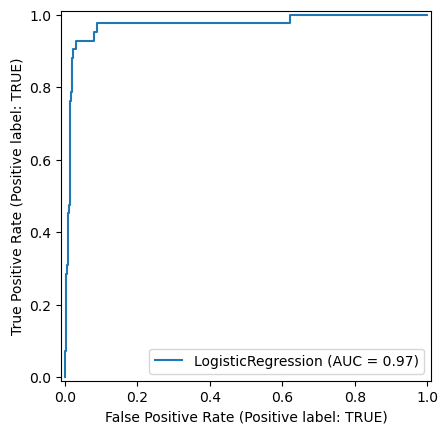

9.27 ms ± 665 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
691 μs ± 8.28 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
peak memory: 473.78 MiB, increment: -0.11 MiB
peak memory: 473.78 MiB, increment: 0.00 MiB
Random Forest Classifier accuracy for demographics: 0.968
Random Forest Classifier f1 score for demographics: 0.09090909090909091
Random Forest Classifierfeature importance: [2.36681021e-03 0.00000000e+00 6.40040708e-04 0.00000000e+00
 0.00000000e+00 3.38697752e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.10383645e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.08363296e-04 0.00000000e+00
 0.00000000e+00 3.11351180e-04 1.84981490e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.59865969e-03 9.58536242e-03 2.37052114e-03 1.49148468e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.93752959e-03
 0.00000000e+00 0.00000000e+00 0.00000000e

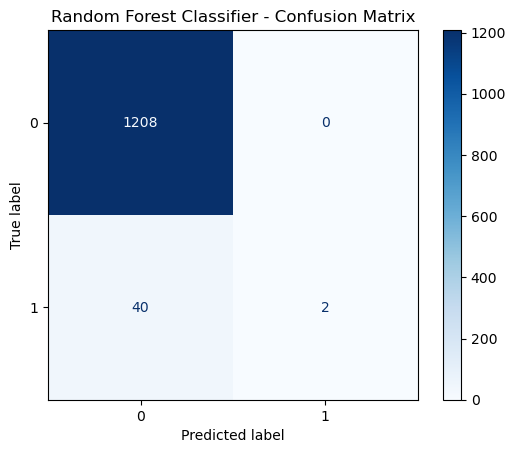

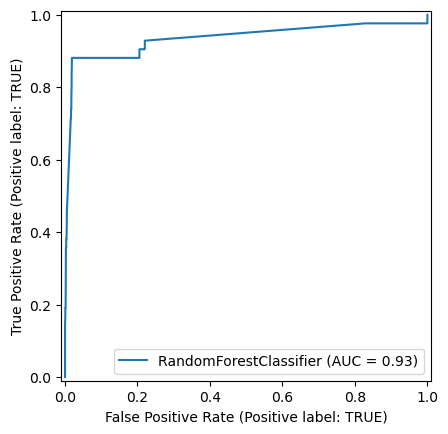

9.6 ms ± 962 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.77 ms ± 192 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
peak memory: 528.27 MiB, increment: 0.00 MiB
peak memory: 528.27 MiB, increment: 0.00 MiB
Bernoulli Naive Bayes accuracy for demographics: 0.9744
Bernoulli Naive Bayes f1 score for demographics: 0.5294117647058824
Bernoulli Naive Bayes feature importance: [[-4.0847357  -5.15108713 -3.85180415 -5.99838499 -4.55802341 -2.63108916
  -6.4038501  -4.82831374 -5.55655224 -5.30523781 -3.75295831 -4.36696817
  -5.36239622 -5.36239622 -3.4771107  -4.00595483 -5.36239622 -5.79771429
  -4.28358656 -6.80931521 -6.58617165 -7.50246239 -5.42302085 -5.36239622
  -5.15108713 -4.10126501 -4.66924904 -3.24684968 -5.01755574 -4.41141993
  -4.76162236 -5.48755937 -7.09699728 -3.96150306 -3.72970145 -3.41648607
  -5.55655224 -6.24969942 -4.8997727  -4.18827638 -4.03672648 -4.0212223
  -2.50863421 -4.43440945 -5.48755937 -4.43440945 -5.99838499 -2.61587974
  -3.45941

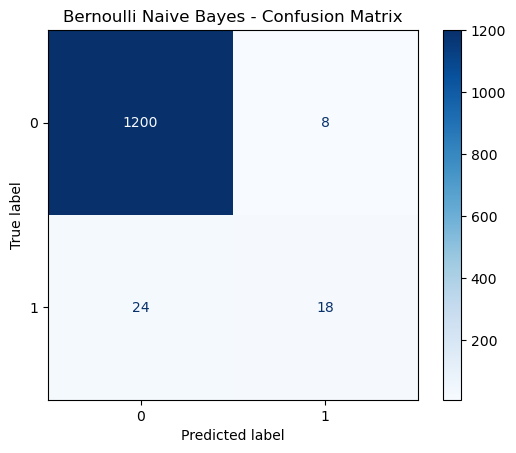

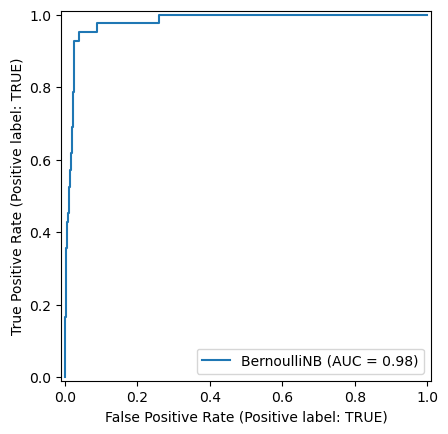

2.6 ms ± 84 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.5 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
peak memory: 543.81 MiB, increment: -0.11 MiB
peak memory: 543.92 MiB, increment: 0.11 MiB
K Nearest Neighbors accuracy for demographics: 0.9656
K Nearest Neighbors f1 score for demographics: 0.044444444444444446
K Nearest Neighbors permutation importance: {'importances_mean': array([-0.00032,  0.     ,  0.0008 ,  0.     ,  0.     ,  0.00224,
        0.     ,  0.     ,  0.     ,  0.     ,  0.0008 ,  0.     ,
        0.     ,  0.0008 , -0.0016 , -0.0008 ,  0.     ,  0.     ,
       -0.0008 ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     , -0.00016,  0.     ,  0.     , -0.0008 ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     , -0.00064,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.0008 ,  0.     ,
        0.00064,  0.     ,  0.     , -0.00016,  0.     , -0.00096,
        0.     ,  0.00064,  0.     ,  0.     ,

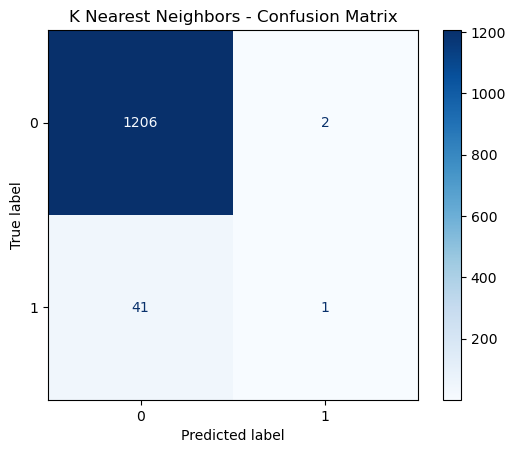

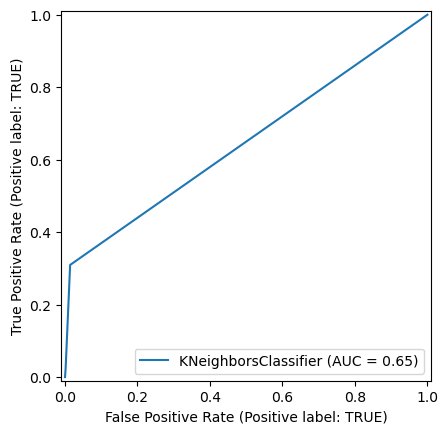

In [74]:
# Run for environmental variables

for name, model in models.items():
    %timeit model.fit(X_train_env, y_train_env)
    %timeit preds = model.predict(X_test_env)
    %memit model.fit(X_train_env, y_train_env)
    %memit preds = model.predict(X_test_env)
    acc = accuracy_score(y_test_env, preds)
    f1score = f1_score(y_test_env, preds, pos_label = "TRUE")
    print(name + " accuracy for demographics: " + str(acc))
    print(name + " f1 score for demographics: " + str(f1score))
    if (name == "Logistic Regression"):
        print(name + " coefficient importances: " + str(model.coef_))
    if (name == "Random Forest Classifier"):
        print(name + "feature importance: " + str(model.feature_importances_))
    if (name == "Bernoulli Naive Bayes"):
        print(name + " feature importance: " + str(model.feature_log_prob_))
    if (name == "K Nearest Neighbors"):
        print (name + " permutation importance: " + str(permutation_importance(model, X_test_env, y_test_env)))

    # Making a confusion matrix
    cm = confusion_matrix(y_test_env, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Making an ROC curve
    RocCurveDisplay.from_estimator(model, X_test_env, y_test_env)
    plt.show()

/Users/luis/miniconda3/envs/mlconda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luis/miniconda3/envs/mlconda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luis/miniconda3/envs/mlconda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luis/miniconda3/envs/mlconda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luis/miniconda3/envs/mlconda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


235 ms ± 3.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.26 ms ± 124 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
peak memory: 545.19 MiB, increment: 0.00 MiB


/Users/luis/miniconda3/envs/mlconda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


peak memory: 545.19 MiB, increment: 0.11 MiB
Logistic Regression accuracy for demographics: 0.9664
Logistic Regression f1 score for demographics: 0.0
Logistic Regression coefficient importance: [[-0.12674448  0.12291276 -0.00350644 -0.23280861 -0.44049573  0.20147167
   0.1398789   0.05201299 -0.42494027  0.71420172 -0.06343981  0.65881009
   0.81037721  0.45056809  1.01006325  0.87814374  0.5099302  -0.0034532
  -0.10820277  0.70223542  0.15925306  0.10191261 -0.60154952  0.79272722
  -0.30650359  0.68302917 -0.21987456  0.62944452  1.18210685 -0.96876164
   0.35583972  0.67409375  0.35285467 -0.21178893 -0.07259113  0.08042824
  -0.32785712 -0.09843133  0.32836622 -0.72778669 -0.70930792  0.15363523
  -0.56709759 -0.68556704  0.16211876 -0.52734443  0.05866356  0.15546577
  -0.38819878 -0.47054734 -0.39963402 -0.3736915   0.06311327 -0.41742775
  -0.31060476 -0.3300125  -0.12324026 -0.29449193 -0.15795559 -0.11202748
  -0.13260058 -0.18156707 -0.03635004 -0.18853073 -0.11420275 -0.09

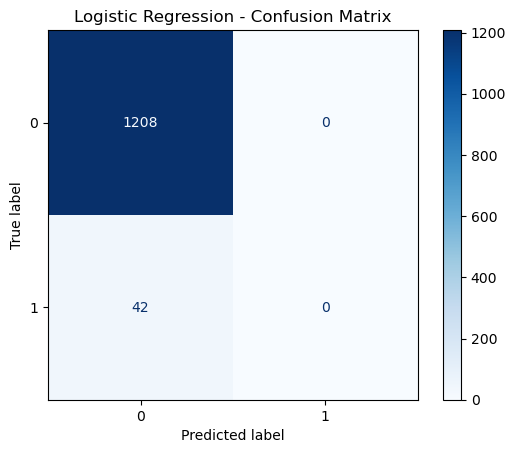

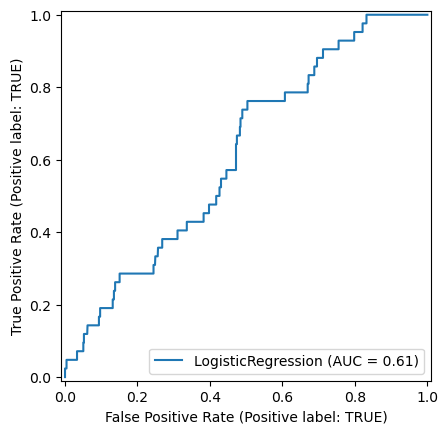

9.31 ms ± 368 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
855 μs ± 18.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
peak memory: 546.30 MiB, increment: -0.11 MiB
peak memory: 546.30 MiB, increment: 0.00 MiB
Random Forest Classifier accuracy for demographics: 0.9664
Random Forest Classifier f1 score for demographics: 0.0
Random Forest Classifierfeature importance: [3.54367722e-02 2.23811372e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.33239186e-02
 1.50850216e-04 9.77748801e-04 2.26610506e-03 9.70833989e-04
 1.11091213e-02 4.91014103e-04 1.86800540e-02 2.89020007e-02
 1.84788639e-02 0.00000000e+00 3.97439391e-02 9.17821239e-03
 0.00000000e+00 1.88259600e-02 9.19131327e-05 1.80878303e-02
 0.00000000e+00 1.30973734e-02 2.94892228e-04 1.47300048e-02
 3.68973630e-02 3.62470426e-03 2.30399577e-04 2.37746558e-03
 2.57526093e-02 0.00000000e+00 3.19150237e-02 3.00466727e-02
 0.00000000e+00 2.78509327e-03 2.76530366e-04 0.00000000e

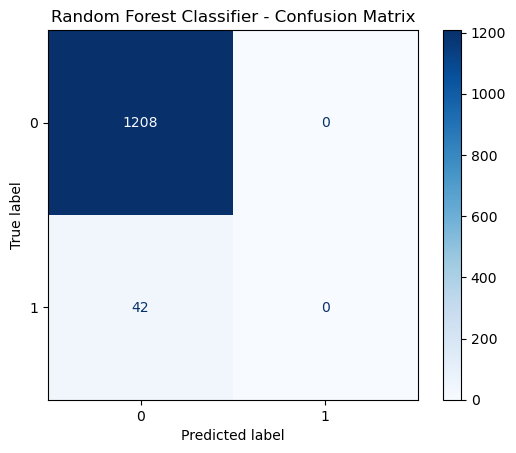

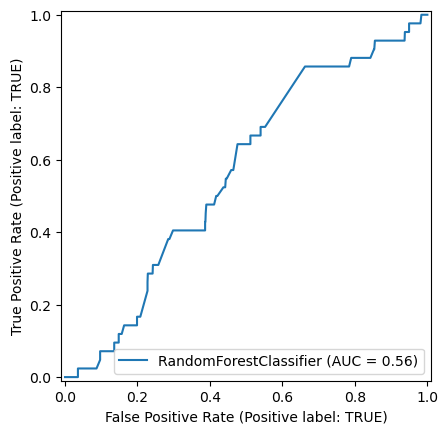

5.46 ms ± 55.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.28 ms ± 425 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
peak memory: 546.33 MiB, increment: -0.11 MiB
peak memory: 546.44 MiB, increment: 0.11 MiB
Bernoulli Naive Bayes accuracy for demographics: 0.9664
Bernoulli Naive Bayes f1 score for demographics: 0.0
Bernoulli Naive Bayes feature importance: [[-1.10803586 -0.40078642 -7.50246239 -5.19987729 -4.61209063 -3.68475006
  -3.6957999  -3.58048905 -3.29033479 -3.40811782 -3.39158852 -3.45067744
  -3.40811782 -3.375328   -3.81358293 -3.58048905 -3.76479277 -3.90515013
  -3.68475006 -3.71827275 -3.87812145 -3.91894345 -3.53217047 -3.86487623
  -4.0847357  -3.78889032 -3.97610186 -3.72970145 -4.26378393 -3.71827275
  -3.97610186 -3.93292969 -3.86487623 -4.20662552 -4.32440856 -3.99091695
  -4.03672648 -4.26378393 -3.94711433 -4.22531765 -4.18827638 -4.17025788
  -4.34546197 -4.26378393 -4.79441219 -4.58469165 -4.58469165 -4.10126501
  -5.19987729 -4.7616

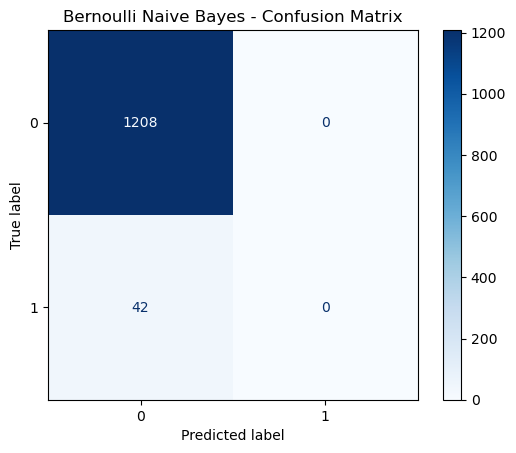

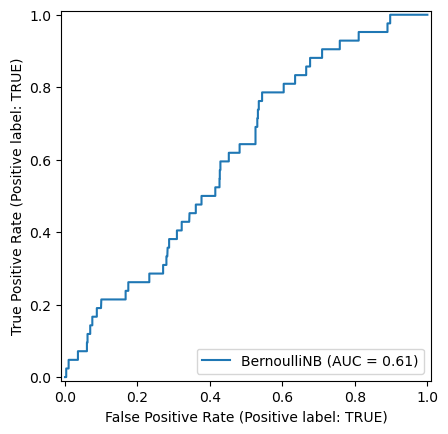

2.03 ms ± 41.3 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
119 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
peak memory: 618.47 MiB, increment: -0.11 MiB
peak memory: 618.58 MiB, increment: 0.11 MiB
K Nearest Neighbors accuracy for demographics: 0.9608
K Nearest Neighbors f1 score for demographics: 0.0


In [ ]:
# Run for demographic variables

for name, model in models.items():
    %timeit model.fit(X_train_dem, y_train_dem)
    %timeit preds = model.predict(X_test_dem)
    %memit model.fit(X_train_dem, y_train_dem)
    %memit preds = model.predict(X_test_dem)
    acc = accuracy_score(y_test_dem, preds)
    f1score = f1_score(y_test_dem, preds , pos_label = "TRUE")
    print(name + " accuracy for demographics: " + str(acc))
    print(name + " f1 score for demographics: " + str(f1score))
    if (name == "Logistic Regression"):
        print(name + " coefficient importance: " + str(model.coef_))
    if (name == "Random Forest Classifier"):
        print(name + "feature importance: " + str(model.feature_importances_))
    if (name == "Bernoulli Naive Bayes"):
        print(name + " feature importance: " + str(model.feature_log_prob_))
    if (name == "K Nearest Neighbors"):
        print (name + " permutation importance: " + str(permutation_importance(model, X_test_dem, y_test_dem)))
    
    # Making a confusion matrix
    cm = confusion_matrix(y_test_dem, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Making an ROC curve
    RocCurveDisplay.from_estimator(model, X_test_dem, y_test_dem)
    plt.show()

#### Conclusion

Accuracy scores were comparable between environmental data tests and demographic data tests, but the fact that f1 scores were higher with environmental data proves that it is a stronger predictor of arrests than demographics. It is important to note that the imbalance between stop outcomes likely affected the ability for the model to evaluate rarer cases such as arrests. Given such, the models that did better at this in metriccs that reflected this discernment like F1, which measures precision and recall, such as Bernoulli Naive Bayes and Logistic Regression, are superior contextually. The speed of Logistic Regression generally and the recall of the 3 Nearest Neighbors classifier was exceedingly slow, so Bernoulli Naive Bayes seems the best in this case.

Although this supports that arrest outcomes are not significantly externally influenced, extreme caution should be taken when applying these results, as they are biased by non-arrest sample size. Nevertheless, it was an excellent tool to learn ML tools.

### Regression

In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Features / targets with slight
X_linear = df[['sin_hour', 'cos_hour', 'officer_age']]
X_linear = pd.concat([pd.get_dummies(df['location_raw']), X_linear], axis=1)
X_linear = X_linear.dropna()
y_linear = df['driver_age'].fillna(0)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.25)

In [ ]:
# Linear regression model
lin_reg = LinearRegression()

In [ ]:
%%timeit
%memit lin_reg.fit(X_train, y_train)

In [ ]:
%%timeit
%memit lin_y_pred = lin_reg.predict(X_test)

In [ ]:
# Gradient boosting model
gb_reg = HistGradientBoostingRegressor()

In [ ]:
%%timeit
%memit gb_reg.fit(X_train, y_train)

In [ ]:
%%timeit
%memit gb_y_pred = grad_reg.predict(X_test)

In [ ]:
# Linear regression RMSE
lin_rmse = root_mean_squared_error(y_test, lin_y_pred)
print(f"Linear Regression Root Mean Squared Error: {lin_rmse:.2f}") 

# Gradient boosting RMSE
gb_rmse = root_mean_squared_error(y_test, grad_y_pred)
print(f"Gradient Boosting Root Mean Squared Error: {grad_rmse:.2f}") 

In [ ]:
# Plot with seaborn
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'HistGradientBoosting'],
    'RMSE': [lin_rmse, gb_rmse] })

sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title('Model RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Regression Model')
plt.tight_layout()
plt.show()

#### Conclusion

Neither of these results are particularly helpful, as a root mean squared error above 10 for age is incredibly high, given that represents more than 10% of the average person's life in either direction from the mean. However, if I had to choose, Linear Regression would be given a slight advantage for its accuracy.

## Works Cited

E. Pierson, C. Simoiu, J. Overgoor, S. Corbett-Davies, V. Ramachandran, C. Phillips, S. Goel. (2017) “A large-scale analysis of racial disparities in police stops across the United States”.

Ruiz-Grossman, S. (2019, March 19). Study Finds Racial Bias In Police Traffic Stops And Searches. HuffPost Voices. https://www.huffpost.com/entry/white-black-drivers-police-stops-searches-racial-bias_n_5c916558e4b0f7ed945d4ba3